# 6. 画笔几何
在生活中，我们可以找到各种各样的几何图案，比如人行道上的地砖、各种形状的房子。不同的几何图形可以组合出丰富的图案。本单元我们将从画正方形开始，了解绘制几何图案的技巧，然后绘制圆，并将正方形和圆进行组合，绘制出更加复杂的几何图案。
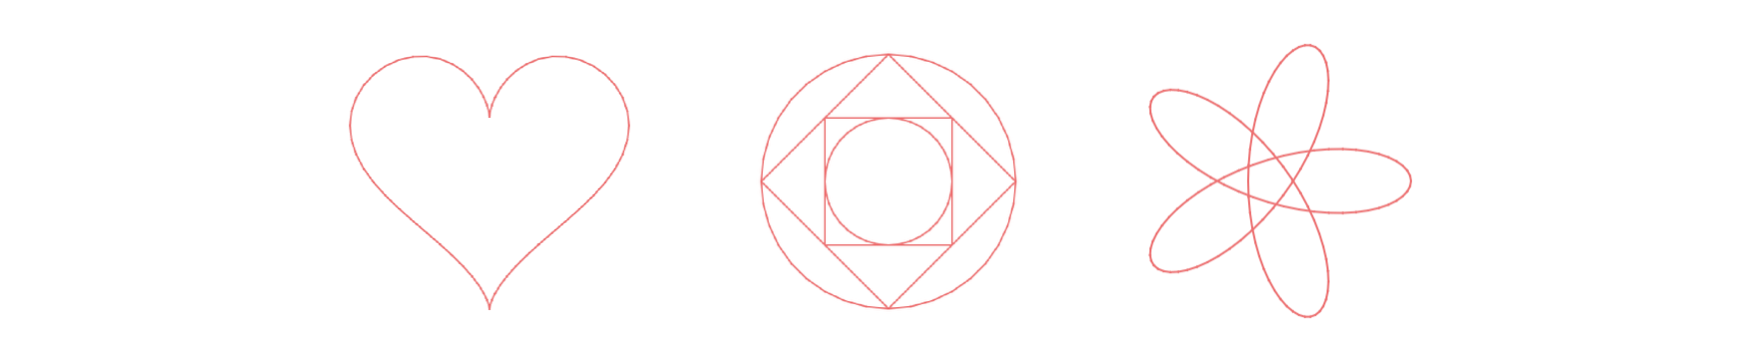

## 画正方形
先体验[画笔几何](https://create.codelab.club/projects/8068/editor/)项目，了解如何使用自制积木让 Scratch 程序模块化，如果第一次接触自制积木，可以先看一下这个[视频](https://www.bilibili.com/video/BV1jT4y1K7iA?p=18)。

In [ ]:
# 画笔几何示例
from IPython.display import IFrame

IFrame('https://create.codelab.club/projects/8068/editor/', width="100%", height=500)

如果想以原点为中心画一个正方形，应该怎么办呢？

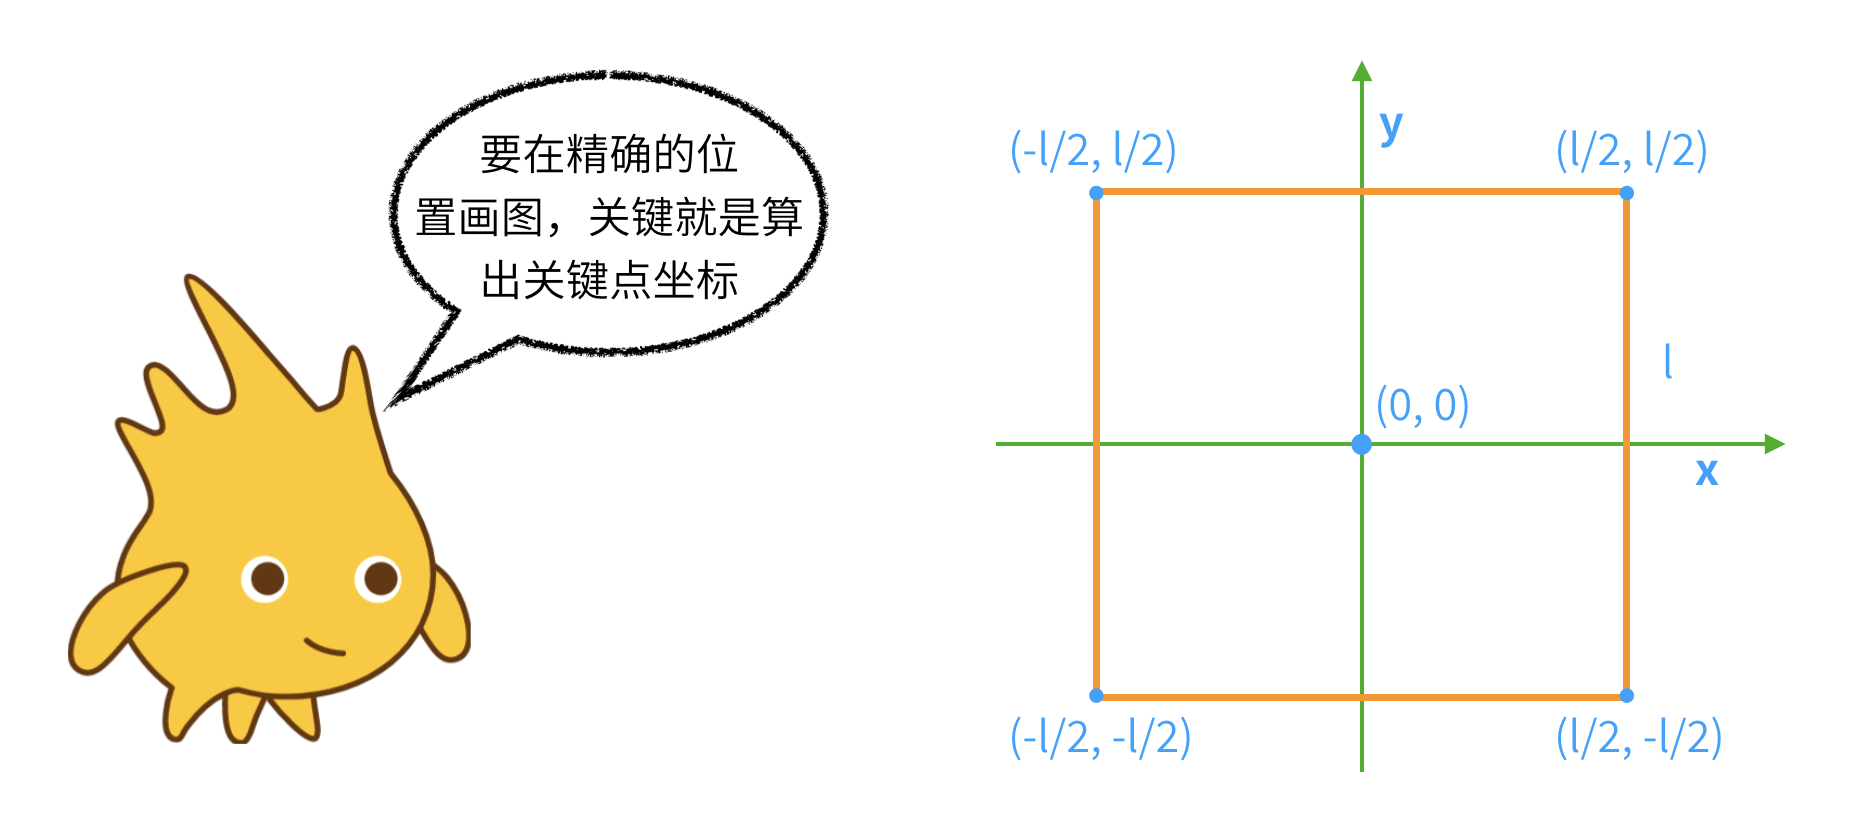

In [ ]:
#【交互计算】画笔几何 https://create.codelab.club/projects/10002/editor
import time
from codelab_adapter_client.message import send_message

# 定义一个画正方形的函数
def square1(l):
    # 设置画正方形的关键坐标
    coordinate = [(l/2, l/2), (l/2, -l/2), (-l/2, -l/2), (-l/2, l/2), (l/2, l/2)]
    for item in coordinate:
        # 将 x、y 坐标拼接在一起，用逗号分开，str() 可以将数字转化成字符串
        msg = str(item[0]) + ',' + str(item[1])
        send_message(msg)  
        time.sleep(0.5)
    send_message('抬笔')
    time.sleep(0.5)
        
square1(100)
square1(200)

### 编程百科
#### 函数
Python 中的函数 (function) 和 Scratch 中的自制积木作用是类似的，它是实现特定功能的一段代码块，使用函数可以让代码模块化。可以把定义函数想象成制作一种乐高积木，这种积木可以拼接到各种结构中并且能够重复使用。

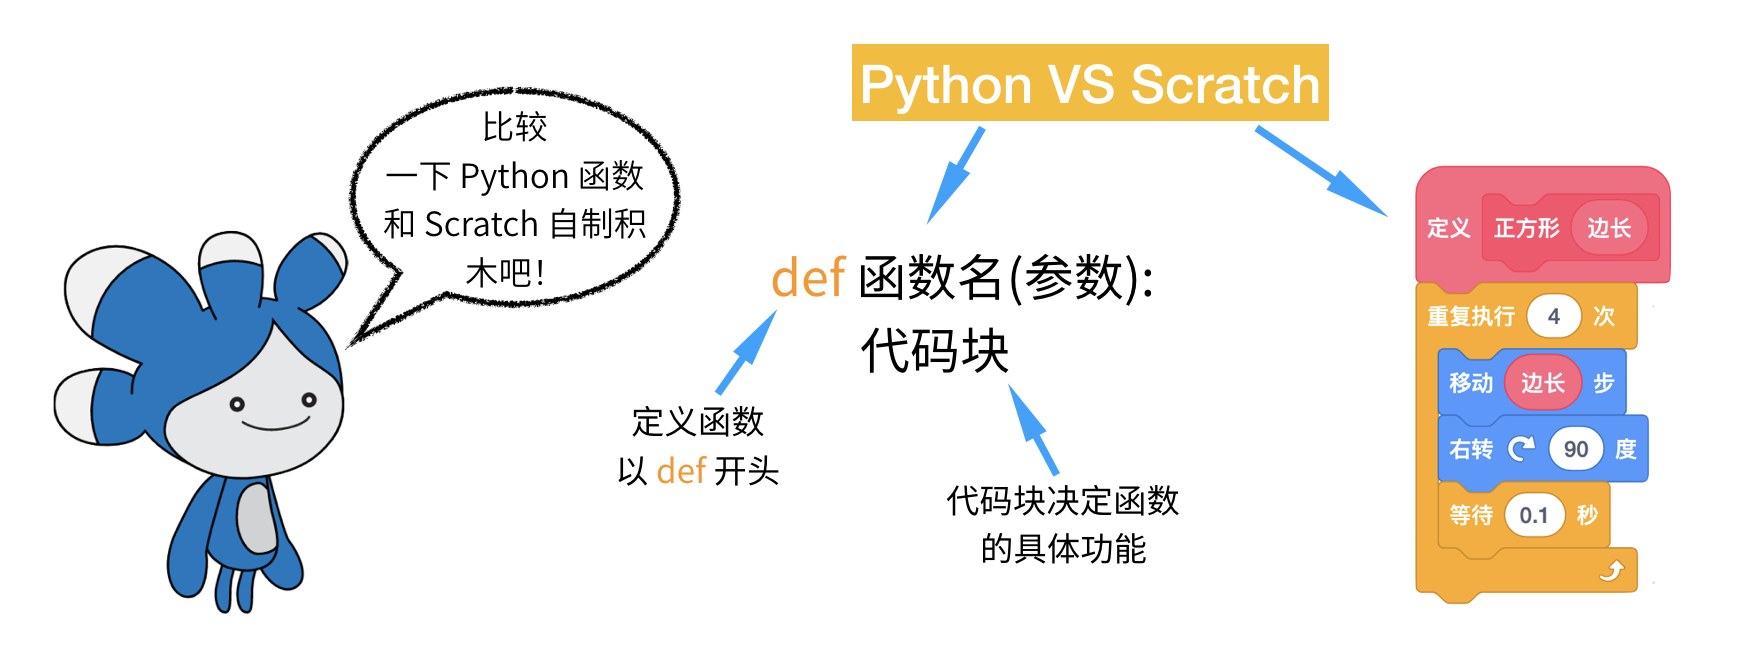

In [ ]:
# 定义一个加法函数
def add(a, b):
    print(a + b)

# 使用函数    
add(3, 5)

注意，函数没有参数也是可以的。Python 中的函数可以使用 return 返回值，而 Scratch 中的自制积木没有这个功能。返回值可以赋值给变量，从而在程序中的其他地方使用。

In [ ]:
def add(a, b):
    c = a + b
    return c

result = add(3, 5)
print(2 * result)

#### 元组
画正方形项目中的坐标是使用元组（tuple）表示的，元组也可以像列表一样存放一系列数据。元组中的数据用括号（）括起来，它的索引方式和列表类似。

In [ ]:
fruit = ('apple', 'banana', 'mango')
print(fruit[2])

不过元组中的数据不可变，而列表中的数据是可变的。

In [ ]:
fruit1 = ['apple', 'banana', 'mango']
fruit1[2] = 'orange'
print(fruit1[2])

fruit2 = ('apple', 'banana', 'mango')
fruit2[2] = 'orange'
print(fruit2[2])

接下来我们来尝试画一个旋转了 45 度的正方形。

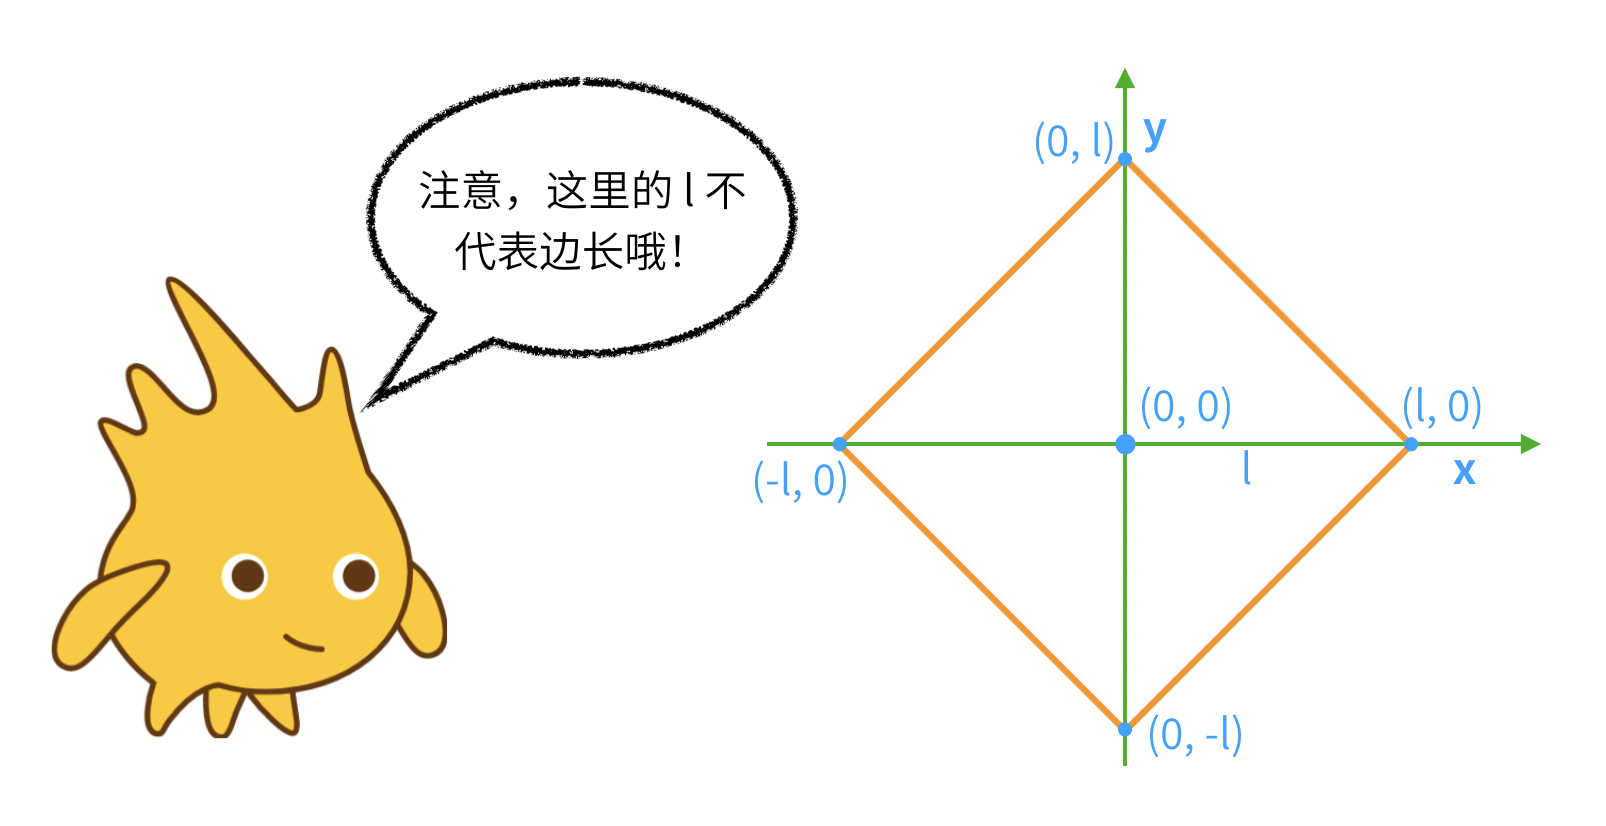

In [ ]:
import time
from codelab_adapter_client.message import send_message

# 画 45 度正方形
def square2(l):
    # 只需修改相应关键点坐标就行
    coordinate = [(-l, 0), (0, l), (l, 0), (0, -l), (-l, 0)]
    for item in coordinate:
        # 将 x、y 坐标拼接在一起，用逗号分开
        msg = str(item[0]) + ',' + str(item[1])
        send_message(msg)  
        time.sleep(0.5)
    send_message('抬笔')
    time.sleep(0.5)
        
square2(100)

再尝试一下画出组合图形，只需将 square1() 和 square2() 进行组合。这里我们尝试用两个角色一起来画图，重新定义了一个函数 squares()。

In [ ]:
import time
from codelab_adapter_client.message import send_message

# 画组合图形
def squares(l):
    coordinate1 = [(l/2, l/2), (l/2, -l/2), (-l/2, -l/2), (-l/2, l/2), (l/2, l/2)]
    coordinate2 = [(-l, 0), (0, l), (l, 0), (0, -l), (-l, 0)]
    for i in range(5):
        msg1 = str(coordinate1[i][0]) + ',' + str(coordinate1[i][1])
        msg2 = str(coordinate2[i][0]) + ',' + str(coordinate2[i][1])
        msg = msg1 + ',' + msg2 
        send_message(msg)  
        time.sleep(0.5)
    send_message('抬笔')
for i in range(100, 300, 100):        
    squares(i)
    time.sleep(0.5)

## 画复杂图案
### 画圆
针对更复杂的图形，如果可以计算出更多点的精确坐标，那么也可以用类似的方式画出来。

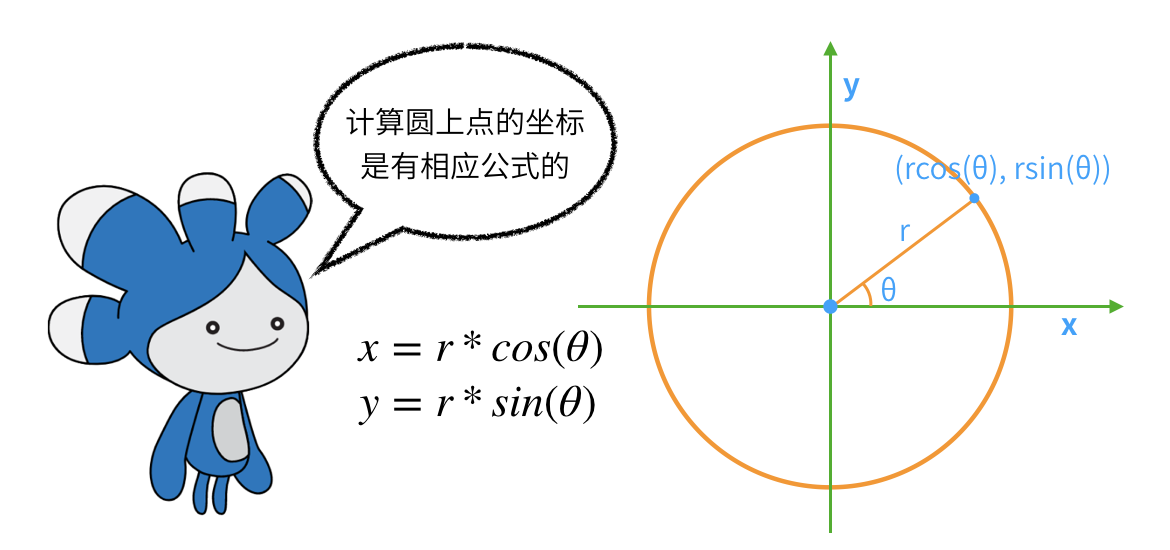

In [ ]:
# 逐步画圆
import math
import time
from codelab_adapter_client.message import send_message

def circle(r):
    for i in range(0, 370, 10): 
        # 计算圆上点的坐标
        x = r * math.cos(math.radians(i))  # math.radians() 将角度转换成弧度
        y = r * math.sin(math.radians(i))
        # format() 函数将浮点数转换成字符串，保留两位小数
        msg = '{:.2f},{:.2f}'.format(x, y)  
        send_message(msg)
        time.sleep(0.1)
        
circle(100)

一个坐标一个坐标发送来画图有点慢，可以把所有坐标拼接起来，一次发送，Scratch 那边再处理收到的数据。

In [ ]:
import math
import time
from codelab_adapter_client.message import send_message

def circle(r):
    coordinates = ''
    for i in range(0, 370, 10): 
        x = r * math.cos(math.radians(i))  
        y = r * math.sin(math.radians(i))
        coordinates += '{:.2f},{:.2f},'.format(x, y)  
    send_message(coordinates + 'coordinates')  # 在消息末尾添加一个 coordinates 表示是多个坐标
        
circle(100)

用圆和正方形组合出魔法阵：

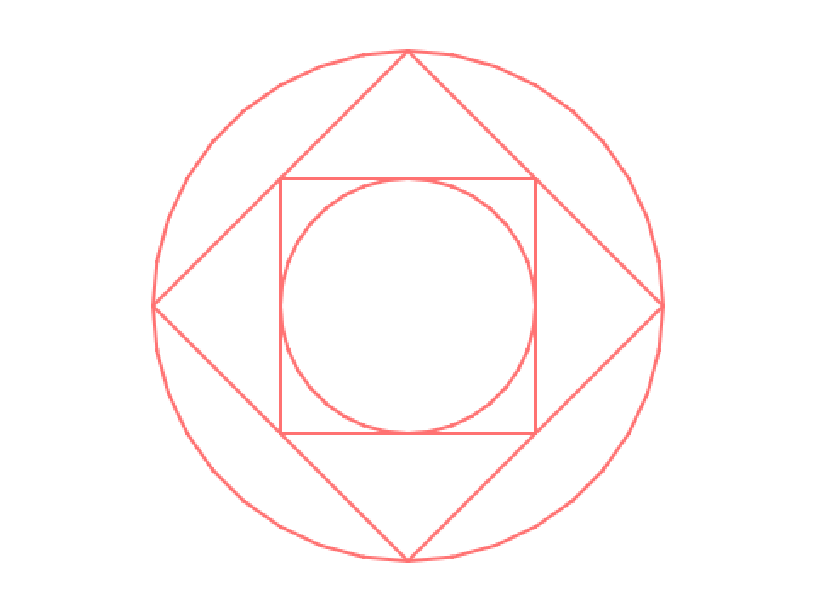

In [ ]:
# 画魔法阵
circle(150)
time.sleep(3)
squares(150) 
time.sleep(2)
circle(75)
time.sleep(3)
#squares(75)

### 画心形
用类似的方式可以画出更复杂的图案，比如一个心形。

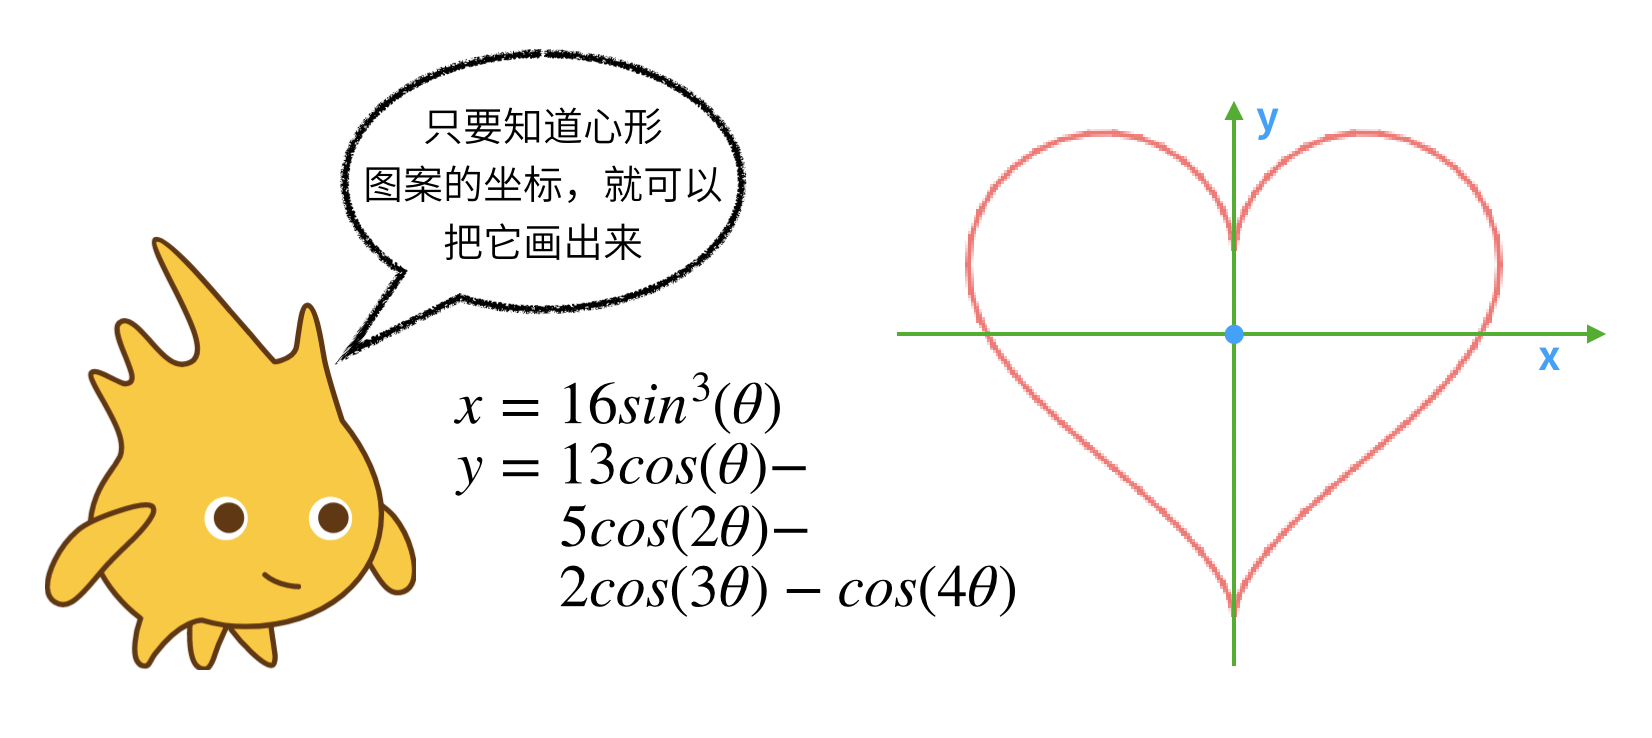

In [ ]:
# 画心形
import math
import time
from codelab_adapter_client.message import send_message

def heart(r):
    coordinates = ''
    for i in range(0, 365, 5): 
        # 计算心形坐标
        x = r * (16*math.sin(math.radians(i))**3)
        y = r * (13*math.cos(math.radians(i))-5*math.cos(2*math.radians(i))-2*math.cos(3*math.radians(i))-math.cos(4*math.radians(i)))
        coordinates += '{:.2f},{:.2f},'.format(x, y)
    send_message(coordinates + 'coordinates')
        
heart(6)

运行以下代码，画出内旋轮线，如果想了解更多内旋轮线的知识，可以点击[这里](https://www.101computing.net/python-turtle-spirograph/)。

In [ ]:
# 画内旋轮线，修改 R、r、d 的值可以画出不同曲线
import math
import time
from codelab_adapter_client.message import send_message

def hypotrochoid(R, r, d):
    cor_str = ''
    for i in range(0, 725, 5): 
        x = (R-r)*math.cos(math.radians(i)) + d*math.cos((R-r)*math.radians(i)/r)
        y = (R-r)*math.sin(math.radians(i)) - d*math.sin((R-r)*math.radians(i)/r)
        cor_str += '{:.2f},{:.2f},'.format(x, y)
    send_message(cor_str + 'coordinates')
        
hypotrochoid(100, 40, 80)

## 拓展
发挥自己的想象，进一步拓展画笔几何的项目，并将作品分享到[【交互计算】画笔几何](https://create.codelab.club/studios/422/)工作室，看看工作室中其他人创作的作品。
1. 前面项目中定义画正方形的函数默认以 （0，0）为中心点，你能定义一个以任意点为中心画正方形的函数吗？

2. 根据画正方形、圆形的函数尝试组合画出更复杂的图形。